In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import numpy.linalg as la
import scipy

## Problem 1

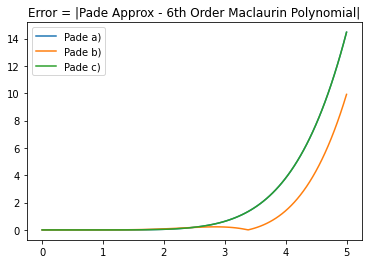

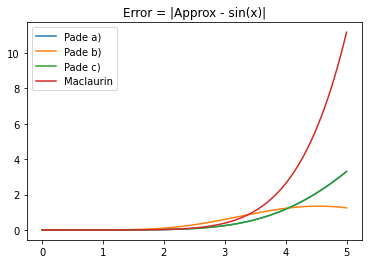

In [2]:
xint = np.linspace(0,5,100)

taylor = lambda x: x - x**3/6 + x**5/120
ytay = taylor(xint)

pa = lambda x: (x - (7/60)*x**3)/(1 + (1/20)*x**2)
pb = lambda x: x/(1 + (1/6)*x**2 + (7/360)*x**4)
pc = lambda x: (x - (7/60)*x**3)/(1 + (1/20)*x**2)

err_pa = abs(pa(xint) - ytay)
err_pb = abs(pb(xint) - ytay)
err_pc = abs(pc(xint) - ytay)

true = np.sin(xint)

trueErr_pa = abs(pa(xint) - true)
trueErr_pb = abs(pb(xint) - true)
trueErr_pc = abs(pc(xint) - true)
trueErr_ptay = abs(ytay - true)

plt.plot(xint, err_pa, label = 'Pade a)')
plt.plot(xint, err_pb, label = 'Pade b)')
plt.plot(xint, err_pc, label = 'Pade c)')
plt.title('Error = |Pade Approx - 6th Order Maclaurin Polynomial|')
plt.legend()
plt.show()

plt.plot(xint, trueErr_pa, label = 'Pade a)')
plt.plot(xint, trueErr_pb, label = 'Pade b)')
plt.plot(xint, trueErr_pc, label = 'Pade c)')
plt.plot(xint, trueErr_ptay, label = 'Maclaurin')
plt.title('Error = |Approx - sin(x)|')
plt.legend()
plt.show()

## Problem 3

### a)

In [3]:
def driver(n, method):
    
    f = lambda x: 1/(1+x*x)
    a = -5
    b = 5
    
    # exact integral
    I_ex = 2*math.atan(5)
    
    # N =100
    # ntest = np.arrange(0,N,step=2)
    
    # errorT = np.zeros(len(ntest))
    # errorS = np.zeros(len(ntest))
    
    # for j in range(0,len(ntest)):
    # n = ntest[j]
    
    ''' for simpson's n must be even '''
    
    if method == 'trap':
        I_trap = CompTrap(a,b,n,f)
        print('I_trap= ', I_trap)

        err = abs(I_ex-I_trap)
        print('absolute error = ', err)
        
    else:
        I_simp = CompSimp(a,b,n,f)
        print('I_simp= ', I_simp)

        err = abs(I_ex-I_simp)
        print('absolute error = ', err)
    
def CompTrap(a,b,n,f):
    
    h = (b-a)/n
    xnode = a+np.arange(0,n+1)*h
    
    I_trap = h*f(xnode[0])*1/2
    
    for j in range(1,n):
        I_trap = I_trap+h*f(xnode[j])
    I_trap= I_trap + 1/2*h*f(xnode[n])
        
    return I_trap

def CompSimp(a,b,n,f):
    
    h = (b-a)/n
    xnode = a+np.arange(0,n+1)*h
    I_simp = f(xnode[0])
    nhalf = n/2
    
    for j in range(1,int(nhalf)+1):
        # even part
        I_simp = I_simp+2*f(xnode[2*j])
        # odd part
        I_simp = I_simp +4*f(xnode[2*j-1])
    
    I_simp= I_simp + f(xnode[n])
    I_simp = h/3*I_simp
    
    return I_simp

In [4]:
driver(10, 'trap')
driver(10,'sims')

I_trap=  2.756108597285068
absolute error =  0.009307063395036064
I_simp=  2.8748114630467567
absolute error =  0.12800992915672493


### c)

In [10]:
driver(1291, 'trap')

I_trap=  2.746801385962369
absolute error =  1.4792766300786298e-07


In [13]:
driver(110,'sims')

I_simp=  2.7491325314429105
absolute error =  0.0023309975528786886


In [7]:
#10^-6
f = lambda x: 1/(1+x*x)
quad = scipy.integrate.quad(f, -5, 5, full_output=0, epsabs=1e-06, limit=100)
print('quad result: ', quad[0])
print('quad error: ', quad[1])
print('# function evaluations: ', 147)

quad result:  2.7468015338900327
quad error:  1.4334139675008473e-08
# function evaluations:  147


In [8]:
#10^-4
f = lambda x: 1/(1+x*x)
quad = scipy.integrate.quad(f, -5, 5, full_output=0, epsabs=1e-04, limit = 100)
print('quad result: ', quad[0])
print('quad error: ', quad[1])
print('# function evaluations: ', 63)

quad result:  2.746801533909586
quad error:  1.0279997850748401e-05
# function evaluations:  63


In [9]:
driver(1291, 'trap')
driver(108, 'sims]')

I_trap=  2.746801385962369
absolute error =  1.4792766300786298e-07
I_simp=  2.74917569778904
absolute error =  0.0023741638990082414
